<a href="https://colab.research.google.com/github/Karolsak/analiza-obwodu/blob/master/analiza_lacpy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!pip install lcapy

  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.23.0 requires attrs>=22.2.0, but you have attrs 18.2.0 which is incompatible.
referencing 0.35.1 requires attrs>=22.2.0, but you have attrs 18.2.0 which is incompatible.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common texlive-base
  texlive-binaries texlive-latex-base xfo

<Axes: xlabel='Frequency (Hz)', ylabel='ASD (nV/rootHz)'>

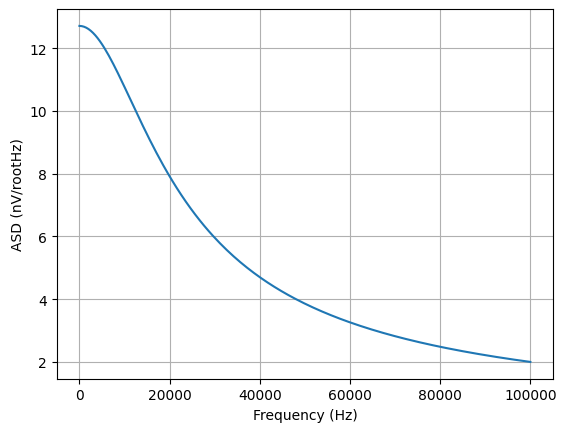

In [6]:
from lcapy import Circuit, f

a = Circuit("""
R 1 0; down
W 1 2; right
C 2 0_2; down
W 0 0_2; right""")

b = a.noisy()

Vn = b.C.V.n(f).subs({'R':10e3, 'C':1e-9, 'T':293, 'k_B':1.38e-23})

from numpy import linspace
vf = linspace(0, 100e3, 200)

from matplotlib.pyplot import savefig
(Vn * 1e9).plot(vf, plot_type='mag', ylabel='ASD (nV/rootHz)')

# savefig(__file__.replace('.py', '.png'), bbox_inches='tight')

In [13]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
C 1 2; right=3.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right=0.5
P1 2_2 0_2; down
W 2 2_2;right=0.5""")

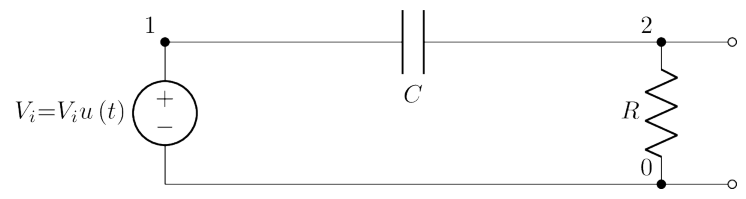

In [14]:
cct.draw()

In [15]:
H = (cct.R.V(s) / cct.Vi.V(s)).simplify(); H

  C⋅R⋅s  
─────────
C⋅R⋅s + 1

In [16]:
H(j * omega)

  ⅉ⋅C⋅R⋅ω  
───────────
ⅉ⋅C⋅R⋅ω + 1

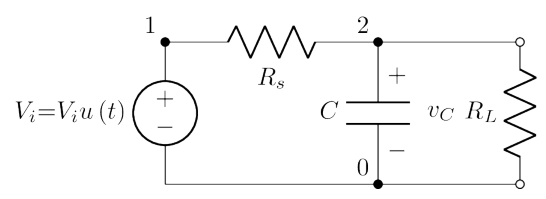

In [17]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
Rs 1 2; right=1.5
C 2 0; down, v=v_C
W1 0_1 0; right
W2 0 0_2; right
P1 2_2 0_2; down
RL 2_2 0_2; down
W3 2 2_2;right""")
cct.draw()

In [21]:
H = cct.RL.V(s) / cct.Vi.V(s)
H

           s            
────────────────────────
     ⎛ 2   s⋅(R_L + Rₛ)⎞
C⋅Rₛ⋅⎜s  + ────────────⎟
     ⎝       C⋅R_L⋅Rₛ  ⎠

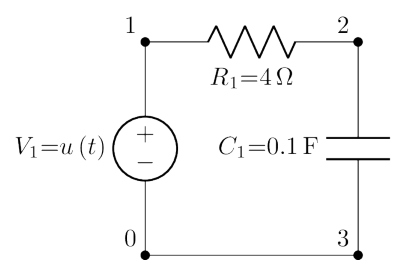

In [24]:
from lcapy import Circuit, s
cct = Circuit("""
V1 1 0 {u(t)}; down
R1 1 2 4; right=1.5
C1 2 3 0.1; down=1.5
W1 0 3; right
""")
cct.draw()

In [25]:
cct[2].V(s)

     5      
────────────
  ⎛ 2   5⋅s⎞
2⋅⎜s  + ───⎟
  ⎝      2 ⎠

In [26]:
cct[2].v

  ⎛       -5⋅t ⎞     
  ⎜       ─────⎟     
  ⎜         2  ⎟     
  ⎜2   2⋅ℯ     ⎟     
5⋅⎜─ - ────────⎟⋅u(t)
  ⎝5      5    ⎠     
─────────────────────
          2          

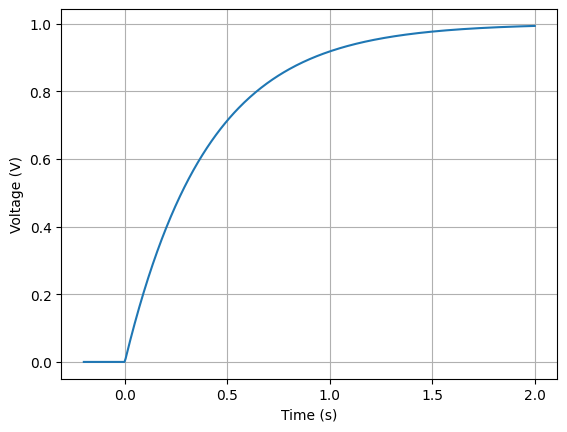

In [27]:
%matplotlib inline
ax = cct[2].v.plot()

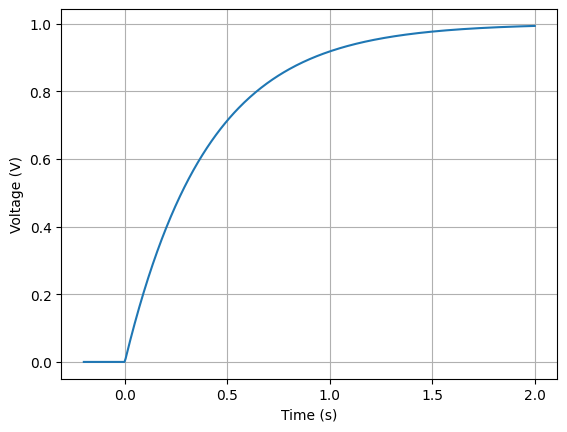

In [28]:
ax = cct[2].v.plot()

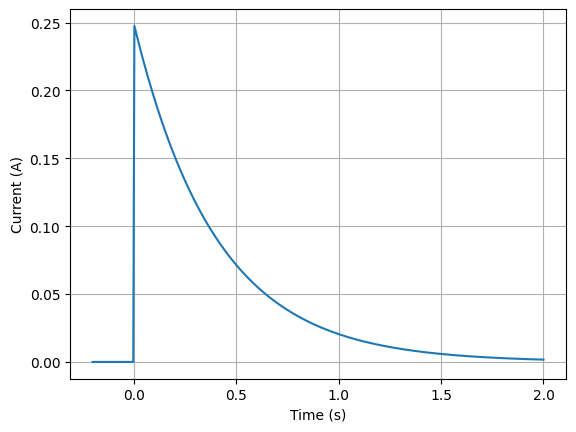

In [31]:
ax = cct.R1.i.plot()

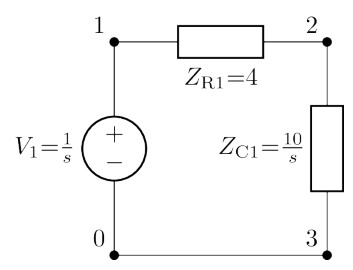

In [33]:
cct.s_model().draw()

In [34]:
cct[2].V(s).ZPK()

      5      
─────────────
2⋅s⋅(s + 5/2)

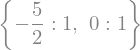

In [35]:
cct[2].V(s).poles()

In [36]:
cct[2].V(s).poles(aslist=True)

[-5/2, 0]

In [37]:
cct[2].V(s).zeros()

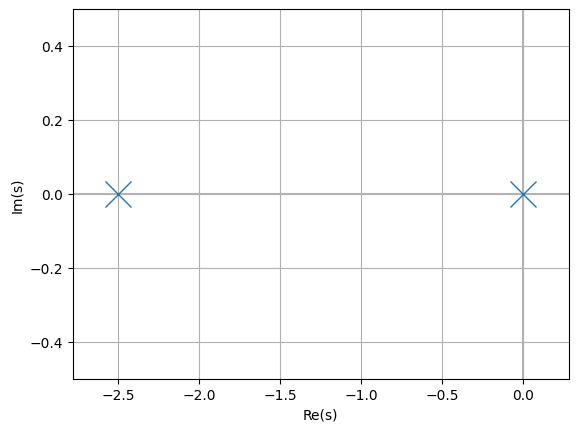

In [38]:
ax =cct[2].V(s).plot()

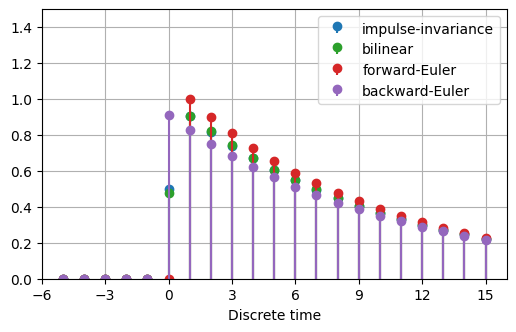

In [42]:
import numpy as np
from matplotlib.pyplot import subplots, style, savefig, show

from lcapy import *

h = exp(-t) * u(t)
h1 = h(n, method='impulse-invariance').subs(dt, 0.1)
# Same as impulse-invariance since there are no zeros
#h2 = h(n, method='matched-Z').subs(dt, 0.1)
h3 = h(n, method='bilinear').subs(dt, 0.1)
h4 = h(n, method='forward-euler').subs(dt, 0.1)
h5 = h(n, method='backward-euler').subs(dt, 0.1)

fig, axes = subplots(1, figsize=(6, 3.5))

h1.plot((-5, 15), axes=axes, label='impulse-invariance', color='C0')
#h2.plot((-5, 15), axes=axes, label='matched-Z', color='C1')
h3.plot((-5, 15), axes=axes, label='bilinear', color='C2')
h4.plot((-5, 15), axes=axes, label='forward-Euler', color='C3')
h5.plot((-5, 15), axes=axes, label='backward-Euler', color='C4')
axes.set_ylim(0, 1.5)

axes.legend()

# savefig(__file__.replace('.py', '.png'), bbox_inches='tight')

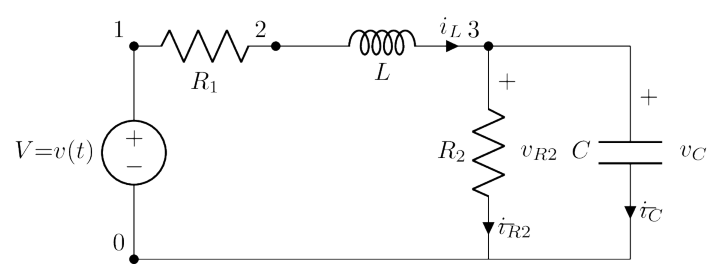

In [59]:
from lcapy import Circuit
cct = Circuit(netlist=
"""
V 1 0 {v(t)}; down
R1 1 2; right
L 2 3; right=1.5, i={i_L}
R2 3 0_3; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0_4; down, i={i_C}, v={v_C}
# L 3_a 4; right=1.5, i={i_L1}
W 0_3 0_4; right
""")
cct.draw(svg=True)

In [60]:
ss=cct.ss
ss.x

⎡i_L(t)⎤
⎢      ⎥
⎣v_C(t)⎦

In [47]:
ss.u

[v(t)]

In [48]:
ss.y

⎡ v₁(t) ⎤
⎢       ⎥
⎢ v₂(t) ⎥
⎢       ⎥
⎢ v₃(t) ⎥
⎢       ⎥
⎢i_V(t) ⎥
⎢       ⎥
⎢i_R1(t)⎥
⎢       ⎥
⎢i_L(t) ⎥
⎢       ⎥
⎢i_R2(t)⎥
⎢       ⎥
⎣i_C(t) ⎦

In [49]:
ss.state_equations()

⎡d         ⎤   ⎡-R₁   -1  ⎤                      
⎢──(i_L(t))⎥   ⎢────  ─── ⎥            ⎡1⎤       
⎢dt        ⎥   ⎢ L     L  ⎥ ⎡i_L(t)⎤   ⎢─⎥       
⎢          ⎥ = ⎢          ⎥⋅⎢      ⎥ + ⎢L⎥⋅[v(t)]
⎢d         ⎥   ⎢ 1    -1  ⎥ ⎣v_C(t)⎦   ⎢ ⎥       
⎢──(v_C(t))⎥   ⎢ ─    ────⎥            ⎣0⎦       
⎣dt        ⎦   ⎣ C    C⋅R₂⎦                      

In [50]:
ss.output_equations()

            ⎡ 0    0 ⎤                      
            ⎢        ⎥                      
⎡ v₁(t) ⎤   ⎢-R₁   0 ⎥            ⎡1⎤       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢ v₂(t) ⎥   ⎢ 0    1 ⎥            ⎢1⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢ v₃(t) ⎥   ⎢-1    0 ⎥            ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢i_V(t) ⎥   ⎢ 1    0 ⎥ ⎡i_L(t)⎤   ⎢0⎥       
⎢       ⎥ = ⎢        ⎥⋅⎢      ⎥ + ⎢ ⎥⋅[v(t)]
⎢i_R1(t)⎥   ⎢ 1    0 ⎥ ⎣v_C(t)⎦   ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢i_L(t) ⎥   ⎢     1  ⎥            ⎢0⎥       
⎢       ⎥   ⎢ 0   ── ⎥            ⎢ ⎥       
⎢i_R2(t)⎥   ⎢     R₂ ⎥            ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎣i_C(t) ⎦   ⎢     -1 ⎥            ⎣0⎦       
            ⎢ 1   ───⎥                      
            ⎣     R₂ ⎦                      

Characteristic (system) polynomial

In [51]:
ss.P

R₂ + (L⋅s + R₁)⋅(C⋅R₂⋅s + 1)
────────────────────────────
           C⋅L⋅R₂           

In [52]:
ss.eigenvalues

⎡                   ___________________________________________                     ______________ ↪
⎢                  ╱  2   2   2                         2    2                     ╱  2   2   2    ↪
⎢  C⋅R₁⋅R₂ + L   ╲╱  C ⋅R₁ ⋅R₂  - 2⋅C⋅L⋅R₁⋅R₂ - 4⋅C⋅L⋅R₂  + L      C⋅R₁⋅R₂ + L   ╲╱  C ⋅R₁ ⋅R₂  -  ↪
⎢- ─────────── - ──────────────────────────────────────────────, - ─────────── + ───────────────── ↪
⎣   2⋅C⋅L⋅R₂                        2⋅C⋅L⋅R₂                        2⋅C⋅L⋅R₂                       ↪

↪ _____________________________⎤
↪                       2    2 ⎥
↪ 2⋅C⋅L⋅R₁⋅R₂ - 4⋅C⋅L⋅R₂  + L  ⎥
↪ ─────────────────────────────⎥
↪   2⋅C⋅L⋅R₂                   ⎦

In [53]:
ss.M

⎡                  ___________________________________________                    ________________ ↪
⎢                 ╱  2   2   2                         2    2                    ╱  2   2   2      ↪
⎢-C⋅R₁⋅R₂ + L - ╲╱  C ⋅R₁ ⋅R₂  - 2⋅C⋅L⋅R₁⋅R₂ - 4⋅C⋅L⋅R₂  + L    -C⋅R₁⋅R₂ + L + ╲╱  C ⋅R₁ ⋅R₂  - 2⋅ ↪
⎢─────────────────────────────────────────────────────────────  ────────────────────────────────── ↪
⎢                           2⋅L⋅R₂                                                         2⋅L⋅R₂  ↪
⎢                                                                                                  ↪
⎣                              1                                                              1    ↪

↪ ___________________________⎤
↪                     2    2 ⎥
↪ C⋅L⋅R₁⋅R₂ - 4⋅C⋅L⋅R₂  + L  ⎥
↪ ───────────────────────────⎥
↪                            ⎥
↪                            ⎥
↪                            ⎦

In [54]:
ss.Phi

⎡            C⋅L⋅R₂⋅s + L                              -C⋅R₂                 ⎤
⎢─────────────────────────────────────  ─────────────────────────────────────⎥
⎢        2                                      2                            ⎥
⎢C⋅L⋅R₂⋅s  + C⋅R₁⋅R₂⋅s + L⋅s + R₁ + R₂  C⋅L⋅R₂⋅s  + C⋅R₁⋅R₂⋅s + L⋅s + R₁ + R₂⎥
⎢                                                                            ⎥
⎢                L⋅R₂                            C⋅L⋅R₂⋅s + C⋅R₁⋅R₂          ⎥
⎢─────────────────────────────────────  ─────────────────────────────────────⎥
⎢        2                                      2                            ⎥
⎣C⋅L⋅R₂⋅s  + C⋅R₁⋅R₂⋅s + L⋅s + R₁ + R₂  C⋅L⋅R₂⋅s  + C⋅R₁⋅R₂⋅s + L⋅s + R₁ + R₂⎦

In [55]:
ss.G

⎡                                         1                                         ⎤
⎢                                                                                   ⎥
⎢                                   R₁⋅(C⋅L⋅R₂⋅s + L)                               ⎥
⎢                   1 - ─────────────────────────────────────────                   ⎥
⎢                         ⎛        2                            ⎞                   ⎥
⎢                       L⋅⎝C⋅L⋅R₂⋅s  + C⋅R₁⋅R₂⋅s + L⋅s + R₁ + R₂⎠                   ⎥
⎢                                                                                   ⎥
⎢                                        R₂                                         ⎥
⎢                       ─────────────────────────────────────                       ⎥
⎢                               2                                                   ⎥
⎢                       C⋅L⋅R₂⋅s  + C⋅R₁⋅R₂⋅s + L⋅s + R₁ + R₂                       ⎥
⎢                                                     

In [32]:
# prompt: randomly select 5 items from a list

import random

# Assuming your list is stored in a variable called 'my_list'
my_list = [
    "R 1 0; down ",
    "W 1 2; right ",
    "C 2 0_2; down ",
    "W 0 0_2; right",
    "Vi 1 0_1 step; down",
    "C 1 2; right=3.5",
    "R 2 0; down",
    "W 0_1 0; right",
    "W 0 0_2; right=0.5",
    "P1 2_2 0_2; down",
    "W 2 2_2;right=0.5",
    "Vi 1 0_1 step; down",
    "Rs 1 2; right=1.5",
    "C 2 0; down, v=v_C",
    "W1 0_1 0; right",
    "W2 0 0_2; right",
    "P1 2_2 0_2; down",
    "RL 2_2 0_2; down",
    "W3 2 2_2;right",
    "V1 1 0 {u(t)}; down",
    "R1 1 2 4; right=1.5",
    "C1 2 3 0.1; down=1.5",
    "W1 0 3; right"
]


selected_items = random.sample(my_list, 5)
selected_items

['RL 2_2 0_2; down',
 'V1 1 0 {u(t)}; down',
 'W2 0 0_2; right',
 'W 0_1 0; right',
 'Vi 1 0_1 step; down']